In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix
import seaborn as sns

import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import to_categorical

Train: X= (50000, 32, 32, 3)  , y= (50000, 1)
Test:  X= (10000, 32, 32, 3)  , y= (10000, 1)


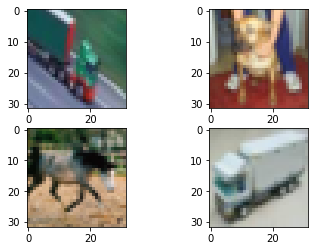

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Train: X=',X_train.shape," , y=", y_train.shape)
print('Test:  X=',X_test.shape," , y=", y_test.shape)
for i in range(4):
	plt.subplot(220 + 1 + i)
	plt.imshow(X_train[50+i])
plt.show()

In [30]:
y_true = y_test.copy()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train Shape:\t",X_train.shape)
print("y_train Shape:\t",y_train.shape)
print("X_test Shape:\t",X_test.shape)
print("y_test Shape:\t",y_test.shape)

X_train Shape:	 (50000, 32, 32, 3)
y_train Shape:	 (50000, 10)
X_test Shape:	 (10000, 32, 32, 3)
y_test Shape:	 (10000, 10)


In [4]:
results=[]

class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        test_acc.append(acc)
        test_loss.append(acc)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

def historyPlot(history,epochs):
  plt.figure(figsize=(10,5))
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.plot(range(1,epochs+1),history["accuracy"])
  plt.plot(range(1,epochs+1),history["val_accuracy"])
  plt.legend(['acc','val_acc'])
  plt.show()
  plt.figure(figsize=(10,5))
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.plot(range(1,epochs+1),history["loss"])
  plt.plot(range(1,epochs+1),history["val_loss"])
  plt.legend(['loss','val_loss'])
  plt.show()
  print('Testing Accuracy: %.2f%%, Loss: %.2f' % (history["val_accuracy"][-1]*100, history["val_loss"][-1]))

2.2


Epoch 1/30
782/782 [==============================] - 16s 20ms/step - loss: 1.7558 - accuracy: 0.3545 - val_loss: 1.2167 - val_accuracy: 0.5750
Epoch 2/30
782/782 [==============================] - 15s 19ms/step - loss: 1.0416 - accuracy: 0.6307 - val_loss: 0.8608 - val_accuracy: 0.6989
Epoch 3/30
782/782 [==============================] - 15s 19ms/step - loss: 0.7631 - accuracy: 0.7334 - val_loss: 0.7529 - val_accuracy: 0.7346
Epoch 4/30
782/782 [==============================] - 15s 19ms/step - loss: 0.6164 - accuracy: 0.7848 - val_loss: 0.7285 - val_accuracy: 0.7565
Epoch 5/30
782/782 [==============================] - 15s 19ms/step - loss: 0.4952 - accuracy: 0.8289 - val_loss: 0.7092 - val_accuracy: 0.7585
Epoch 6/30
782/782 [==============================] - 15s 19ms/step - loss: 0.3927 - accuracy: 0.8622 - val_loss: 0.7182 - val_accuracy: 0.7707
Epoch 7/30
782/782 [==============================] - 15s 19ms/step - loss: 0.3111 - accuracy: 0.8907 - val_loss: 0.7809 - val_accuracy:

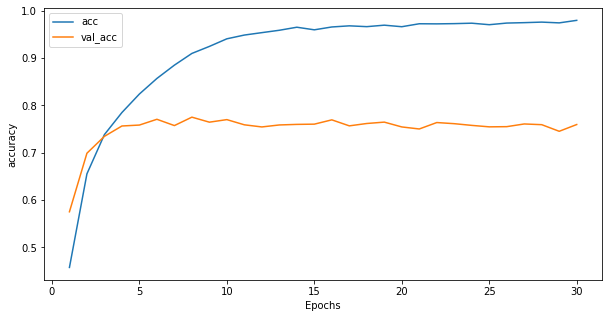

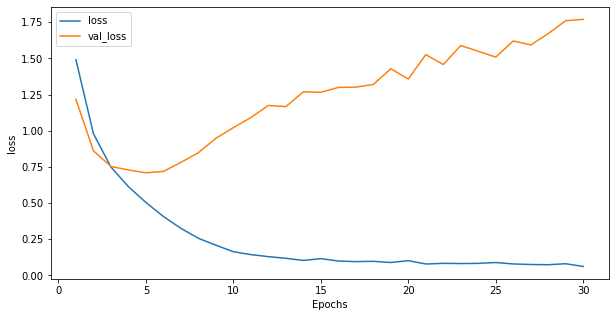

Testing Accuracy: 75.96%, Loss: 1.77
Train Time: 453.94 


In [ ]:
def mainModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=30
mainModel = mainModel()
start = time.time()
mainModelHistory = mainModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
mainModelTrainTime = end-start
historyPlot(mainModelHistory.history,epochs)
print('Train Time: %.2f ' % (mainModelTrainTime))
results.append({
    "model_name" : "mainModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (mainModelTrainTime)),
    "accuracy" : mainModelHistory.history["accuracy"][-1],
    "val_accuracy": mainModelHistory.history["val_accuracy"][-1],
    "loss":mainModelHistory.history["loss"][-1],
    "val_loss":mainModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})

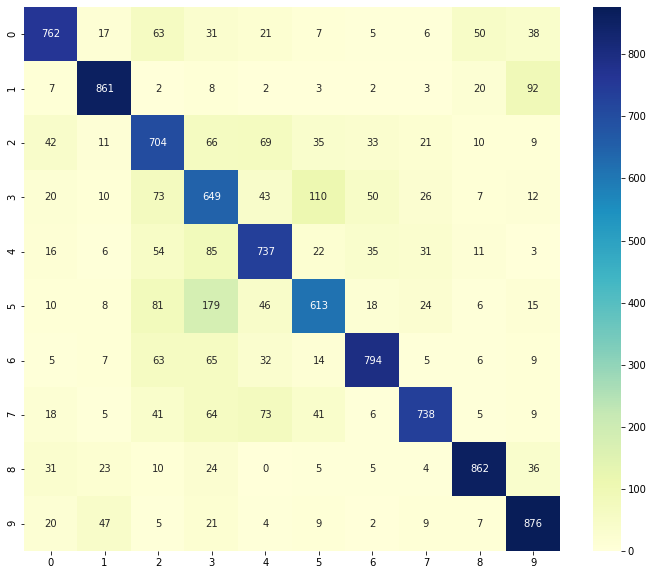

In [ ]:
results.append({
    "model_name" : "mainModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (mainModelTrainTime)),
    "accuracy" : mainModelHistory.history["accuracy"][-1],
    "val_accuracy": mainModelHistory.history["val_accuracy"][-1],
    "loss":mainModelHistory.history["loss"][-1],
    "val_loss":mainModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})
y_pred_mainModel = pd.DataFrame(mainModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_mainModel),cmap="YlGnBu",annot=True,fmt="d")

2.3

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 2.0749 - accuracy: 0.2767 - val_loss: 1.7320 - val_accuracy: 0.3814
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7375 - accuracy: 0.3854 - val_loss: 1.6760 - val_accuracy: 0.4056
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.6580 - accuracy: 0.4119 - val_loss: 1.6255 - val_accuracy: 0.4188
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 1.6137 - accuracy: 0.4274 - val_loss: 1.5982 - val_accuracy: 0.4186
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5708 - accuracy: 0.4420 - val_loss: 1.5847 - val_accuracy: 0.4404
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5509 - accuracy: 0.4555 - val_loss: 1.5478 - val_accuracy: 0.4429
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5356 - accuracy: 0.4578 - val_loss: 1.5323 - val_accuracy: 0.4562
Epoch 

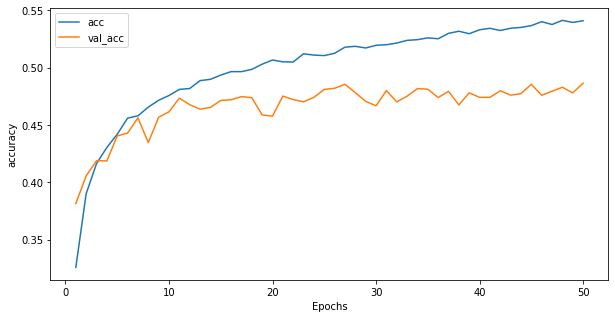

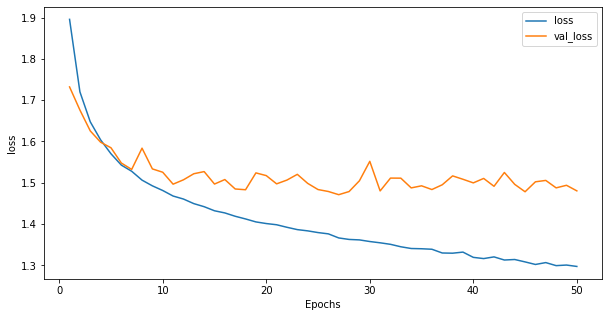

Testing Accuracy: 48.64%, Loss: 1.48
Train Time: 170.179 Seconds


In [ ]:
# 0 Layer
def withoutFilterModel():
  model = Sequential()
  model.add(Flatten(input_shape = (32,32,3)))
  model.add(Dense(256,activation=('relu'))) 
  model.add(Dense(10,activation=('softmax'))) 
  model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
  return model
epochs=50
withoutFilterModel = withoutFilterModel()
start = time.time()
withoutFilterModelHistory = withoutFilterModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
withoutFilterModelTrainTime = end-start
historyPlot(withoutFilterModelHistory.history,epochs)
print('Train Time: %.2f Seconds' % (withoutFilterModelTrainTime))

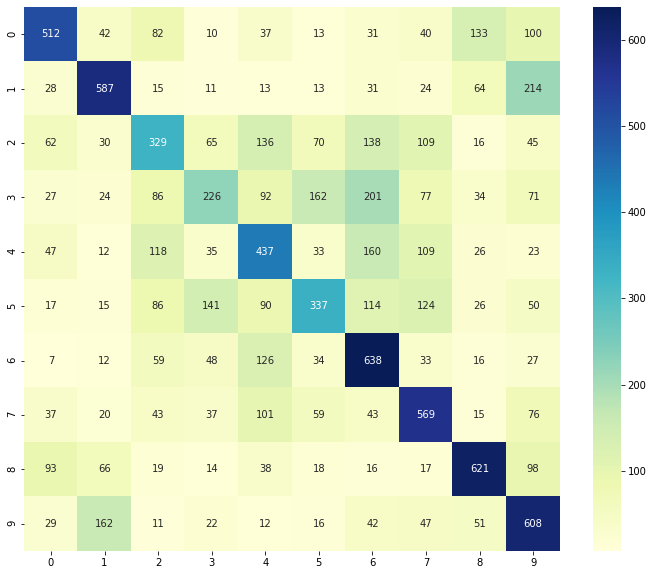

In [ ]:
zresults.append({
    "model_name" : "withoutFilterModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (withoutFilterModelTrainTime)),
    "accuracy" : withoutFilterModelHistory.history["accuracy"][-1],
    "val_accuracy": withoutFilterModelHistory.history["val_accuracy"][-1],
    "loss":withoutFilterModelHistory.history["loss"][-1],
    "val_loss":withoutFilterModelHistory.history["val_loss"][-1],
    "epochs" : "50",
})
y_pred_withoutFilterModel = pd.DataFrame(withoutFilterModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_withoutFilterModel),cmap="YlGnBu",annot=True,fmt="d")

Epoch 1/30
782/782 [==============================] - 9s 11ms/step - loss: 1.6191 - accuracy: 0.4181 - val_loss: 1.1401 - val_accuracy: 0.6011
Epoch 2/30
782/782 [==============================] - 8s 11ms/step - loss: 1.0052 - accuracy: 0.6461 - val_loss: 0.9605 - val_accuracy: 0.6657
Epoch 3/30
782/782 [==============================] - 8s 11ms/step - loss: 0.8205 - accuracy: 0.7153 - val_loss: 0.9216 - val_accuracy: 0.6783
Epoch 4/30
782/782 [==============================] - 8s 11ms/step - loss: 0.6709 - accuracy: 0.7670 - val_loss: 0.9752 - val_accuracy: 0.6709
Epoch 5/30
782/782 [==============================] - 8s 11ms/step - loss: 0.5520 - accuracy: 0.8098 - val_loss: 0.9719 - val_accuracy: 0.6799
Epoch 6/30
782/782 [==============================] - 8s 11ms/step - loss: 0.4181 - accuracy: 0.8569 - val_loss: 1.0490 - val_accuracy: 0.6782
Epoch 7/30
782/782 [==============================] - 8s 11ms/step - loss: 0.3043 - accuracy: 0.8978 - val_loss: 1.1423 - val_accuracy: 0.6772

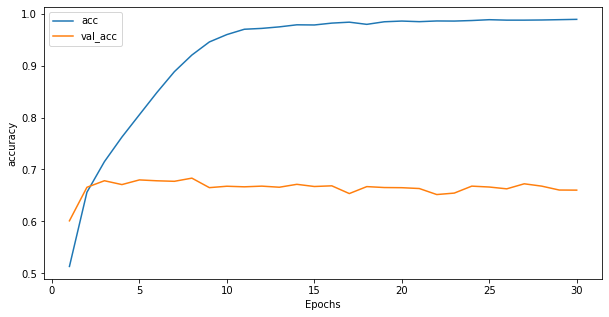

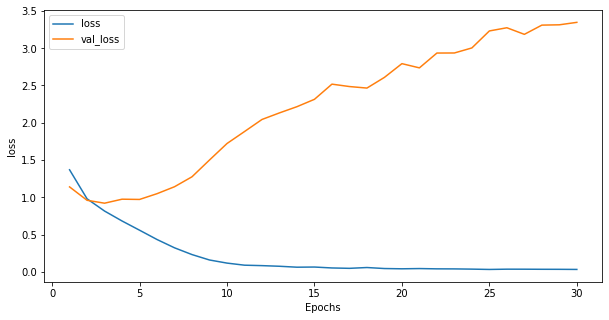

Testing Accuracy: 66.02%, Loss: 3.35
Train Time: 248.85 


In [ ]:
# 1 Layer
def oneConvLayerModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=30
oneConvLayerModel = oneConvLayerModel()
start = time.time()
oneConvLayerModelHistory = oneConvLayerModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
oneConvLayerModelTrainTime = end-start
historyPlot(oneConvLayerModelHistory.history,epochs)
print('Train Time: %.2f ' % (oneConvLayerModelTrainTime))

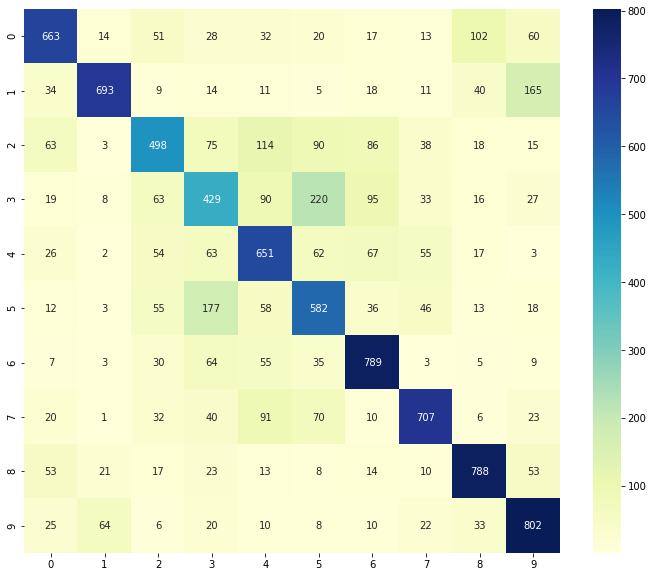

In [ ]:
results.append({
    "model_name" : "oneConvLayerModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (oneConvLayerModelTrainTime)),
    "accuracy" : oneConvLayerModelHistory.history["accuracy"][-1],
    "val_accuracy": oneConvLayerModelHistory.history["val_accuracy"][-1],
    "loss":oneConvLayerModelHistory.history["loss"][-1],
    "val_loss":oneConvLayerModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})
y_pred_oneConvLayerModel = pd.DataFrame(oneConvLayerModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_oneConvLayerModel),cmap="YlGnBu",annot=True,fmt="d")

Epoch 1/30
782/782 [==============================] - 13s 15ms/step - loss: 1.6300 - accuracy: 0.4110 - val_loss: 0.9923 - val_accuracy: 0.6496
Epoch 2/30
782/782 [==============================] - 12s 15ms/step - loss: 0.9188 - accuracy: 0.6764 - val_loss: 0.8976 - val_accuracy: 0.6845
Epoch 3/30
782/782 [==============================] - 12s 15ms/step - loss: 0.7093 - accuracy: 0.7537 - val_loss: 0.7772 - val_accuracy: 0.7350
Epoch 4/30
782/782 [==============================] - 12s 15ms/step - loss: 0.5659 - accuracy: 0.8020 - val_loss: 0.7249 - val_accuracy: 0.7561
Epoch 5/30
782/782 [==============================] - 12s 15ms/step - loss: 0.4212 - accuracy: 0.8522 - val_loss: 0.7727 - val_accuracy: 0.7481
Epoch 6/30
782/782 [==============================] - 12s 15ms/step - loss: 0.3101 - accuracy: 0.8906 - val_loss: 0.8123 - val_accuracy: 0.7499
Epoch 7/30
782/782 [==============================] - 12s 15ms/step - loss: 0.2139 - accuracy: 0.9259 - val_loss: 0.9207 - val_accuracy:

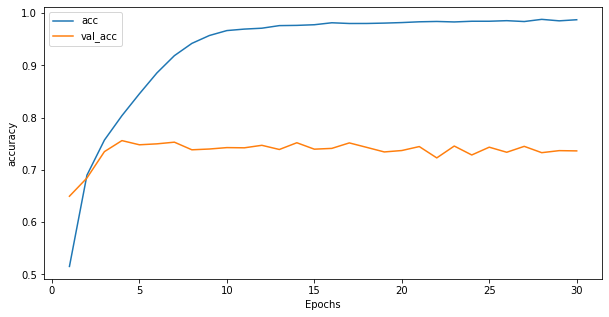

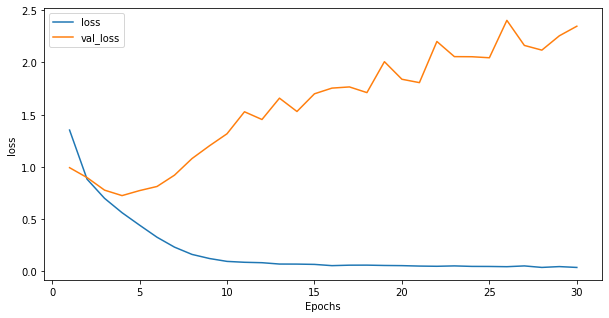

Testing Accuracy: 73.64%, Loss: 2.35
Train Time: 352.20 


In [ ]:
# 2 Layer
def twoConvLayerModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=30
twoConvLayerModel = twoConvLayerModel()
start = time.time()
twoConvLayerModelHistory = twoConvLayerModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
twoConvLayerModelTrainTime = end-start
historyPlot(twoConvLayerModelHistory.history,epochs)
print('Train Time: %.2f ' % (twoConvLayerModelTrainTime))

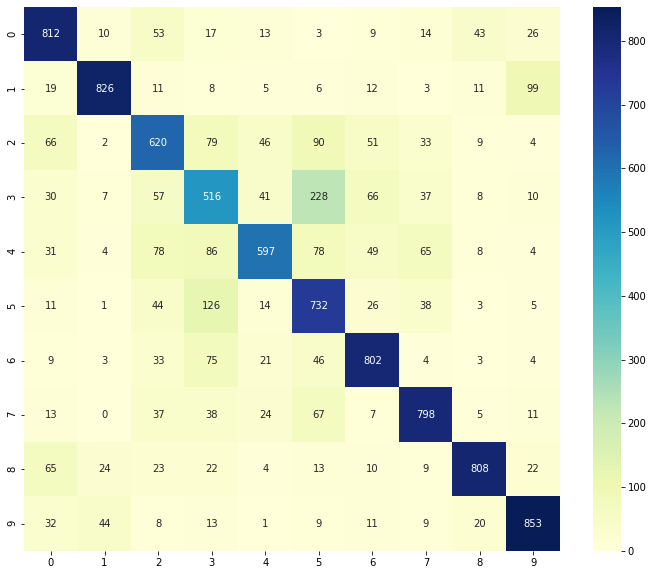

In [ ]:
results.append({
    "model_name" : "twoConvLayerModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (twoConvLayerModelTrainTime)),
    "accuracy" : twoConvLayerModelHistory.history["accuracy"][-1],
    "val_accuracy": twoConvLayerModelHistory.history["val_accuracy"][-1],
    "loss":twoConvLayerModelHistory.history["loss"][-1],
    "val_loss":twoConvLayerModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})
y_pred_twoConvLayerModel = pd.DataFrame(twoConvLayerModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_twoConvLayerModel),cmap="YlGnBu",annot=True,fmt="d")

2.4

Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 2.3385 - accuracy: 0.0984 - val_loss: 2.1087 - val_accuracy: 0.2265
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 1.9747 - accuracy: 0.2732 - val_loss: 1.7429 - val_accuracy: 0.3597
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 1.6858 - accuracy: 0.3904 - val_loss: 1.5576 - val_accuracy: 0.4382
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 1.5037 - accuracy: 0.4575 - val_loss: 1.4129 - val_accuracy: 0.4888
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 1.3770 - accuracy: 0.5071 - val_loss: 1.3477 - val_accuracy: 0.5208
Epoch 6/10
782/782 [==============================] - 16s 20ms/step - loss: 1.2713 - accuracy: 0.5479 - val_loss: 1.2543 - val_accuracy: 0.5520
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 1.1788 - accuracy: 0.5800 - val_loss: 1.2128 - val_accuracy:

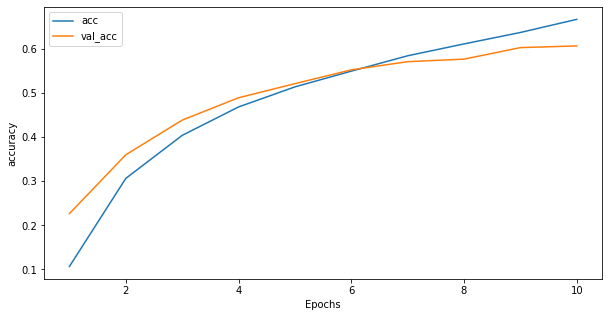

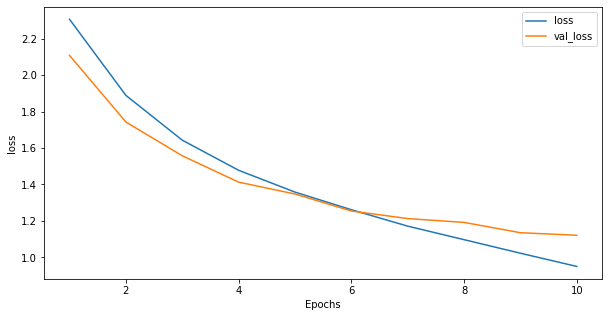

Testing Accuracy: 60.63%, Loss: 1.12
Train Time: 160.15 


In [ ]:
#Sigmoid
def sigmoidActivationModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='sigmoid', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=10
sigmoidActivationModel = sigmoidActivationModel()
start = time.time()
sigmoidActivationModelHistory = sigmoidActivationModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
sigmoidActivationModelTrainTime = end-start
historyPlot(sigmoidActivationModelHistory.history,epochs)
print('Train Time: %.2f ' % (sigmoidActivationModelTrainTime))

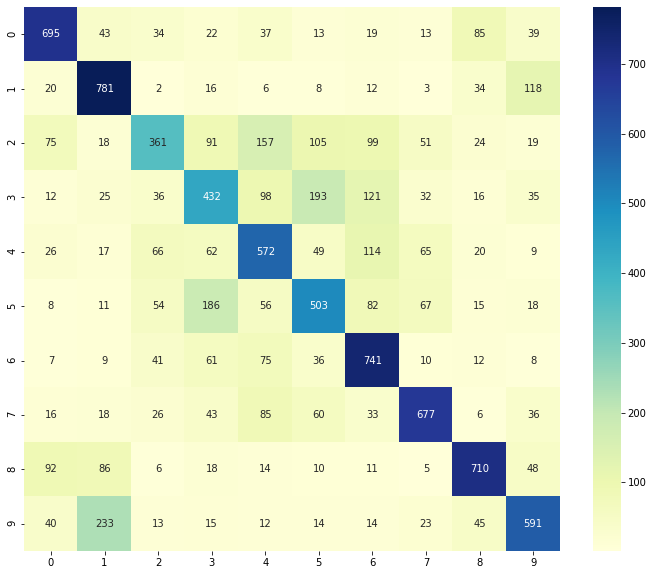

In [ ]:
results.append({
    "model_name" : "sigmoidActivationModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (sigmoidActivationModelTrainTime)),
    "accuracy" : sigmoidActivationModelHistory.history["accuracy"][-1],
    "val_accuracy": sigmoidActivationModelHistory.history["val_accuracy"][-1],
    "loss":sigmoidActivationModelHistory.history["loss"][-1],
    "val_loss":sigmoidActivationModelHistory.history["val_loss"][-1],
    "epochs" : "10",
})
y_pred_sigmoidActivationModel = pd.DataFrame(sigmoidActivationModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_sigmoidActivationModel),cmap="YlGnBu",annot=True,fmt="d")

Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 1.5432 - accuracy: 0.4473 - val_loss: 1.1395 - val_accuracy: 0.6203
Epoch 2/10
782/782 [==============================] - 16s 20ms/step - loss: 0.8999 - accuracy: 0.6879 - val_loss: 0.8711 - val_accuracy: 0.6999
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.6925 - accuracy: 0.7618 - val_loss: 0.8298 - val_accuracy: 0.7224
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.5746 - accuracy: 0.8012 - val_loss: 0.7952 - val_accuracy: 0.7320
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.5008 - accuracy: 0.8262 - val_loss: 0.8553 - val_accuracy: 0.7169
Epoch 6/10
782/782 [==============================] - 16s 20ms/step - loss: 0.4429 - accuracy: 0.8471 - val_loss: 0.7724 - val_accuracy: 0.7469
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 0.3869 - accuracy: 0.8644 - val_loss: 0.7921 - val_accuracy:

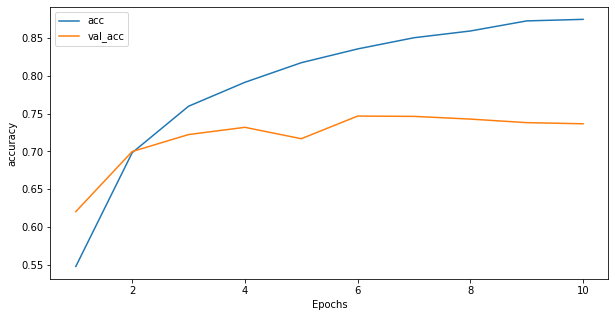

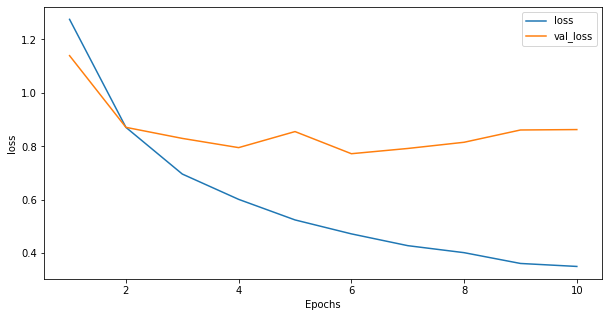

Testing Accuracy: 73.67%, Loss: 0.86
Train Time: 160.81 


In [ ]:
#Tanh
def tanhActivationModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='tanh', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='tanh', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='tanh'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=10
tanhActivationModel = tanhActivationModel()
start = time.time()
tanhActivationModelHistory = tanhActivationModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
tanhActivationModelTrainTime = end-start
historyPlot(tanhActivationModelHistory.history,epochs)
print('Train Time: %.2f ' % (tanhActivationModelTrainTime))

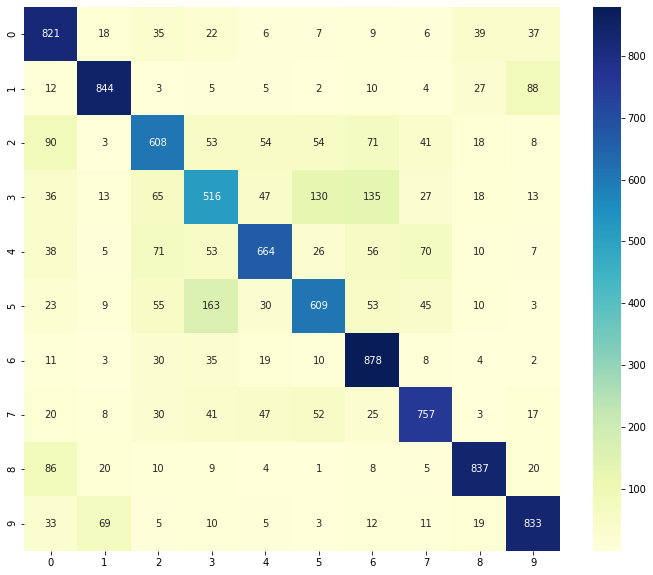

In [ ]:
results.append({
    "model_name" : "tanhActivationModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (tanhActivationModelTrainTime)),
    "accuracy" : tanhActivationModelHistory.history["accuracy"][-1],
    "val_accuracy": tanhActivationModelHistory.history["val_accuracy"][-1],
    "loss":tanhActivationModelHistory.history["loss"][-1],
    "val_loss":tanhActivationModelHistory.history["val_loss"][-1],
    "epochs" : "10",
})
y_pred_tanhActivationModel = pd.DataFrame(tanhActivationModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_tanhActivationModel),cmap="YlGnBu",annot=True,fmt="d")

Epoch 1/10
782/782 [==============================] - 16s 20ms/step - loss: 1.7884 - accuracy: 0.3318 - val_loss: 1.1160 - val_accuracy: 0.5999
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 1.0519 - accuracy: 0.6235 - val_loss: 0.9018 - val_accuracy: 0.6848
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.8041 - accuracy: 0.7145 - val_loss: 0.7799 - val_accuracy: 0.7258
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.6446 - accuracy: 0.7740 - val_loss: 0.7742 - val_accuracy: 0.7411
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.5445 - accuracy: 0.8071 - val_loss: 0.6604 - val_accuracy: 0.7713
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.4312 - accuracy: 0.8497 - val_loss: 0.6907 - val_accuracy: 0.7700
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3558 - accuracy: 0.8750 - val_loss: 0.7041 - val_accuracy:

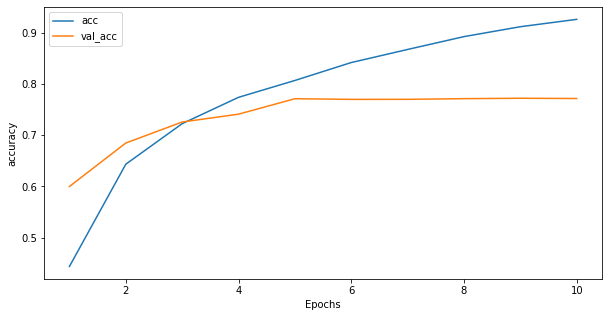

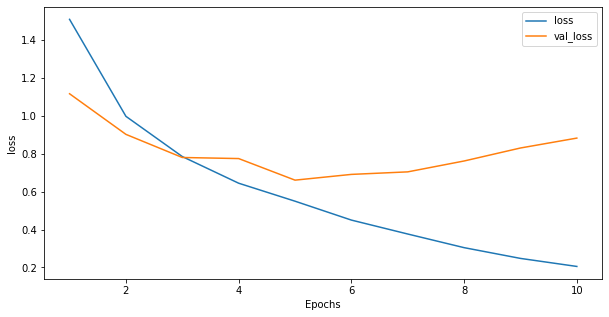

Testing Accuracy: 77.17%, Loss: 0.88
Train Time: 151.86 


In [ ]:
#Relu
#Tanh
def reluActivationModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=10
reluActivationModel = reluActivationModel()
start = time.time()
reluActivationModelHistory = reluActivationModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
reluActivationModelTrainTime = end-start
historyPlot(reluActivationModelHistory.history,epochs)
print('Train Time: %.2f ' % (reluActivationModelTrainTime))

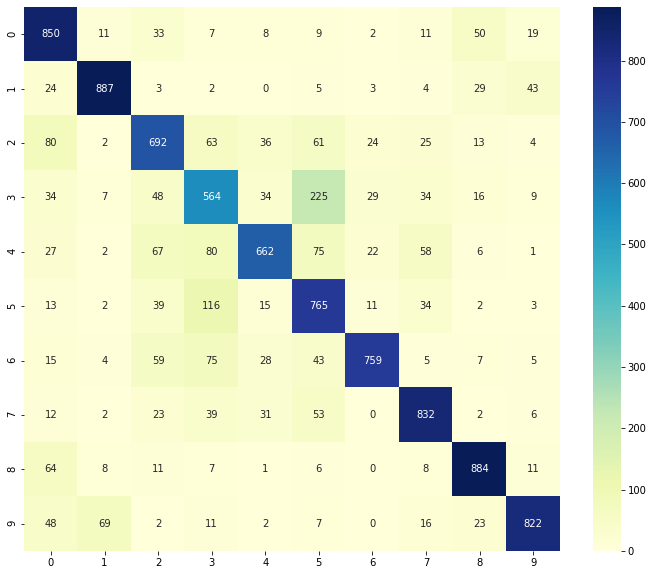

In [ ]:
results.append({
    "model_name" : "reluActivationModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (reluActivationModelTrainTime)),
    "accuracy" : reluActivationModelHistory.history["accuracy"][-1],
    "val_accuracy": reluActivationModelHistory.history["val_accuracy"][-1],
    "loss":reluActivationModelHistory.history["loss"][-1],
    "val_loss":reluActivationModelHistory.history["val_loss"][-1],
    "epochs" : "10",
})
y_pred_reluActivationModel = pd.DataFrame(reluActivationModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_reluActivationModel),cmap="YlGnBu",annot=True,fmt="d")

Text(0, 0.5, 'Accuracy')

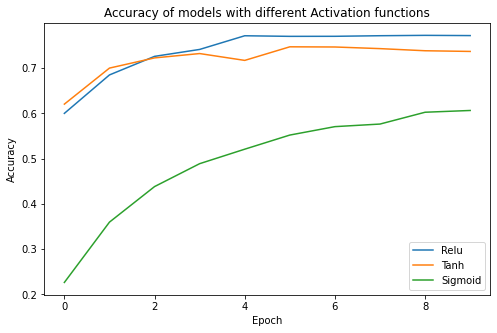

In [ ]:
#Output Graph
plt.figure(figsize=(8,5))
plt.plot(range(10),reluActivationModelHistory.history["val_accuracy"],label="Relu")
plt.plot(range(10),tanhActivationModelHistory.history["val_accuracy"],label="Tanh")
plt.plot(range(10),sigmoidActivationModelHistory.history["val_accuracy"],label="Sigmoid")
plt.legend()
plt.title("Accuracy of models with different Activation functions")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

2.5

Epoch 1/10
782/782 [==============================] - 40s 9ms/step - loss: 1.7489 - accuracy: 0.3454 - val_loss: 1.2358 - val_accuracy: 0.5564
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0762 - accuracy: 0.6164 - val_loss: 0.9830 - val_accuracy: 0.6615
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8311 - accuracy: 0.7067 - val_loss: 0.8165 - val_accuracy: 0.7146
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6731 - accuracy: 0.7575 - val_loss: 0.7207 - val_accuracy: 0.7464
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5450 - accuracy: 0.8071 - val_loss: 0.7005 - val_accuracy: 0.7631
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4401 - accuracy: 0.8442 - val_loss: 0.6978 - val_accuracy: 0.7688
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3527 - accuracy: 0.8763 - val_loss: 0.7728 - val_accuracy: 0.7596
Epoch

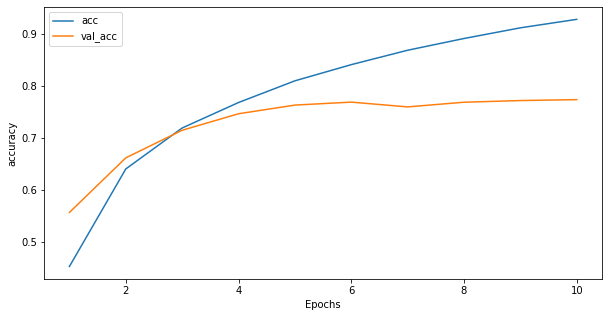

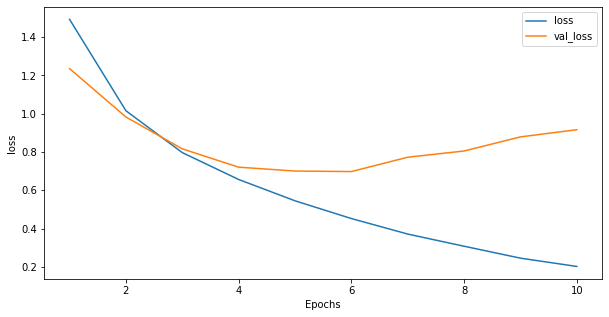

Testing Accuracy: 77.36%, Loss: 0.92
Train Time: 96.46 


In [5]:
#adam
epochs=10
adam_mainModel = mainModel()
start = time.time()
adam_mainModelHistory = adam_mainModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
adam_mainModelTrainTime = end-start
historyPlot(adam_mainModelHistory.history,epochs)
print('Train Time: %.2f ' % (adam_mainModelTrainTime))
results.append({
    "model_name" : "adam_mainModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (adam_mainModelTrainTime)),
    "accuracy" : adam_mainModelHistory.history["accuracy"][-1],
    "val_accuracy": adam_mainModelHistory.history["val_accuracy"][-1],
    "loss":adam_mainModelHistory.history["loss"][-1],
    "val_loss":adam_mainModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 2.2585 - accuracy: 0.1536 - val_loss: 1.9984 - val_accuracy: 0.2788
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8351 - accuracy: 0.3431 - val_loss: 1.5953 - val_accuracy: 0.4317
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5702 - accuracy: 0.4371 - val_loss: 1.4739 - val_accuracy: 0.4670
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.4212 - accuracy: 0.4910 - val_loss: 1.3620 - val_accuracy: 0.5088
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.3326 - accuracy: 0.5279 - val_loss: 1.2744 - val_accuracy: 0.5476
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2566 - accuracy: 0.5555 - val_loss: 1.2253 - val_accuracy: 0.5628
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1794 - accuracy: 0.5860 - val_loss: 1.2143 - val_accuracy: 0.5660
Epoch 

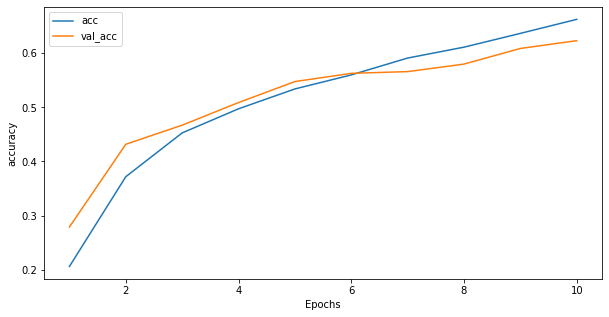

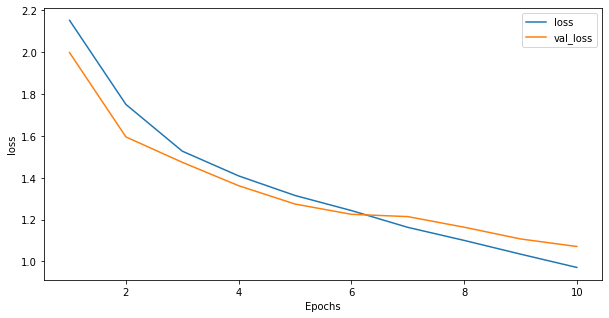

Testing Accuracy: 62.32%, Loss: 1.07
Train Time: 63.75 


In [6]:
#Gradiend Descent
from keras.optimizers import SGD

def SGD_OptimizerModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=10
SGD_OptimizerModel = SGD_OptimizerModel()
start = time.time()
SGD_OptimizerModelHistory = SGD_OptimizerModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
SGD_OptimizerModelTrainTime = end-start
historyPlot(SGD_OptimizerModelHistory.history,epochs)
print('Train Time: %.2f ' % (SGD_OptimizerModelTrainTime))

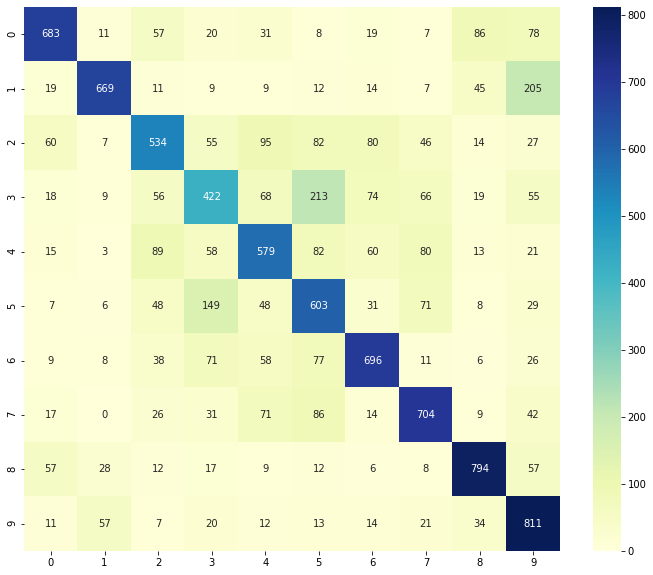

In [ ]:
results.append({
    "model_name" : "SGD_OptimizerModel",
    "optimizer" : "SGD",
    "train_time" : ('%.2f' % (SGD_OptimizerModelTrainTime)),
    "accuracy" :SGD_OptimizerModelHistory.history["accuracy"][-1],
    "val_accuracy": SGD_OptimizerModelHistory.history["val_accuracy"][-1],
    "loss":SGD_OptimizerModelHistory.history["loss"][-1],
    "val_loss":SGD_OptimizerModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})
y_pred_SGD_OptimizerModel = pd.DataFrame(SGD_OptimizerModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_SGD_OptimizerModel),cmap="YlGnBu",annot=True,fmt="d")

Text(0, 0.5, 'Accuracy')

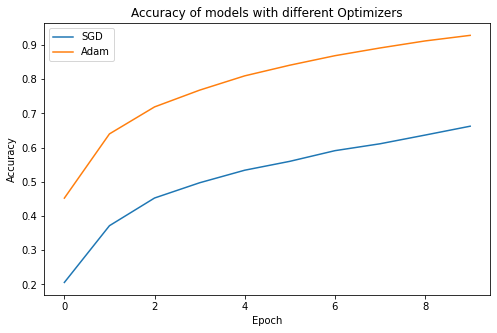

In [7]:
plt.figure(figsize=(8,5))
plt.plot(range(10),SGD_OptimizerModelHistory.history["accuracy"],label="SGD")
plt.plot(range(10),adam_mainModelHistory.history["accuracy"],label="Adam")
plt.legend()
plt.title("Accuracy of models with different Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

2.6

In [37]:
#Reduced Samples
np.random.seed(70)
selected_index = np.array([])
for i in range(10):
  temp = np.random.choice(np.where(y_train==i)[0],600)
  selected_index = np.append(selected_index,temp)
selected_index = selected_index.astype("int32")
selected_index = selected_index.tolist()

y_train_R = y_train[selected_index]
X_train_R = X_train[selected_index]

y_train_R = to_categorical(y_train_R,10)

print(X_train_R.shape)
print(y_train_R.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 32, 32, 3)
(6000, 10)
(10000, 32, 32, 3)
(10000, 10)


Epoch 1/30
94/94 [==============================] - 2s 16ms/step - loss: 6.1656 - accuracy: 0.1626 - val_loss: 1.9721 - val_accuracy: 0.2861
Epoch 2/30
94/94 [==============================] - 1s 12ms/step - loss: 1.8248 - accuracy: 0.3293 - val_loss: 1.6417 - val_accuracy: 0.3908
Epoch 3/30
94/94 [==============================] - 1s 12ms/step - loss: 1.5396 - accuracy: 0.4333 - val_loss: 1.5057 - val_accuracy: 0.4431
Epoch 4/30
94/94 [==============================] - 1s 12ms/step - loss: 1.3802 - accuracy: 0.5009 - val_loss: 1.5062 - val_accuracy: 0.4614
Epoch 5/30
94/94 [==============================] - 1s 12ms/step - loss: 1.2494 - accuracy: 0.5477 - val_loss: 1.4476 - val_accuracy: 0.4837
Epoch 6/30
94/94 [==============================] - 1s 12ms/step - loss: 1.1135 - accuracy: 0.6047 - val_loss: 1.4724 - val_accuracy: 0.4772
Epoch 7/30
94/94 [==============================] - 1s 12ms/step - loss: 0.9585 - accuracy: 0.6652 - val_loss: 1.4568 - val_accuracy: 0.5100
Epoch 8/30
94

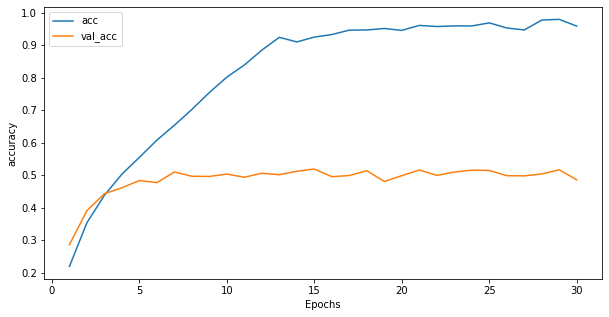

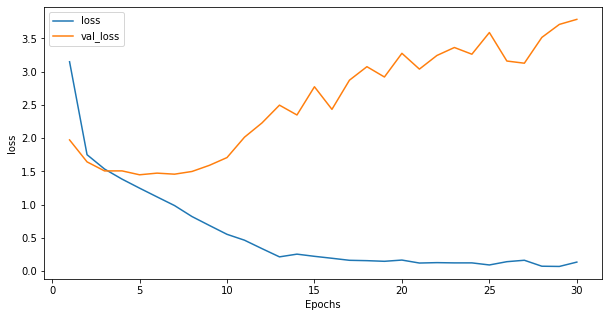

Testing Accuracy: 48.59%, Loss: 3.79
Train Time: 35.08 


In [40]:
#Training
epochs=30
reduced_mainModel = mainModel()
start = time.time()
reduced_mainModelHistory = reduced_mainModel.fit(X_train_R, y_train_R, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
reduced_mainModelTrainTime = end-start
historyPlot(reduced_mainModelHistory.history,epochs)
print('Train Time: %.2f ' % (reduced_mainModelTrainTime))
results.append({
    "model_name" : "reduced_mainModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (reduced_mainModelTrainTime)),
    "accuracy" : reduced_mainModelHistory.history["accuracy"][-1],
    "val_accuracy": reduced_mainModelHistory.history["val_accuracy"][-1],
    "loss":reduced_mainModelHistory.history["loss"][-1],
    "val_loss":reduced_mainModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})

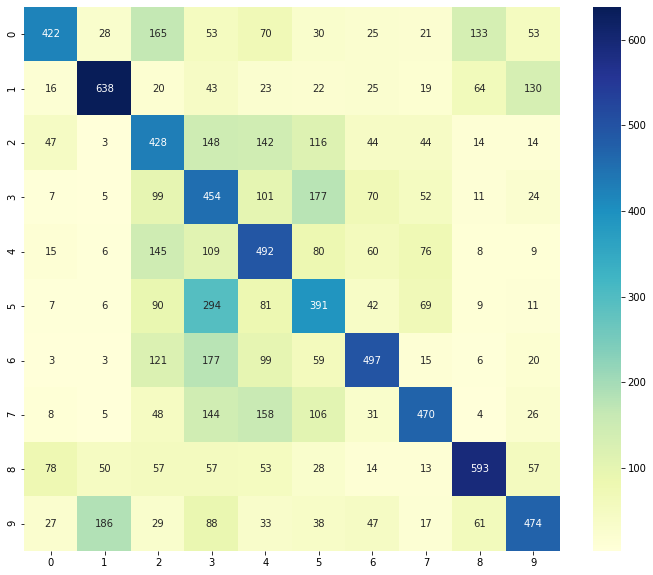

In [41]:
y_pred_reduced = pd.DataFrame(reduced_mainModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_reduced),cmap="YlGnBu",annot=True,fmt="d")

2.7

Epoch 1/30
782/782 [==============================] - 11s 13ms/step - loss: 1.7571 - accuracy: 0.3441 - val_loss: 1.3238 - val_accuracy: 0.5420
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.1204 - accuracy: 0.6019 - val_loss: 0.9969 - val_accuracy: 0.6505
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8787 - accuracy: 0.6887 - val_loss: 0.9712 - val_accuracy: 0.6671
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7120 - accuracy: 0.7490 - val_loss: 0.8937 - val_accuracy: 0.6927
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.5828 - accuracy: 0.7958 - val_loss: 0.9202 - val_accuracy: 0.6990
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.4589 - accuracy: 0.8390 - val_loss: 0.9193 - val_accuracy: 0.7050
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.3544 - accuracy: 0.8746 - val_loss: 1.0445 - val_accuracy:

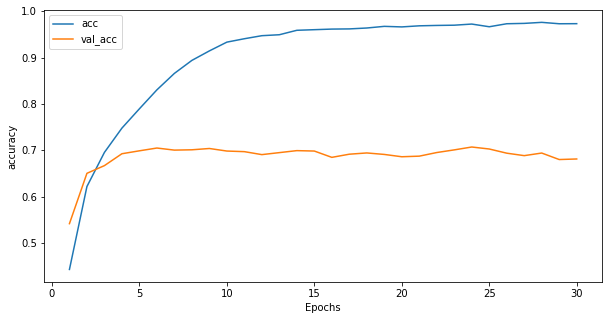

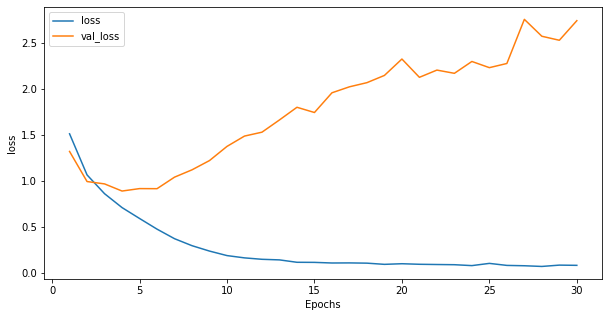

Testing Accuracy: 68.14%, Loss: 2.75
Train Time: 297.80 


In [ ]:
def mergedConvModel():
  model = Sequential()
  model.add(Conv2D(32, (6, 6), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (6, 6), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (6, 6), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=30
mergedConvModel = mergedConvModel()
start = time.time()
mergedConvModelHistory = mergedConvModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
mergedConvModelTrainTime = end-start
historyPlot(mergedConvModelHistory.history,epochs)
print('Train Time: %.2f ' % (mergedConvModelTrainTime))

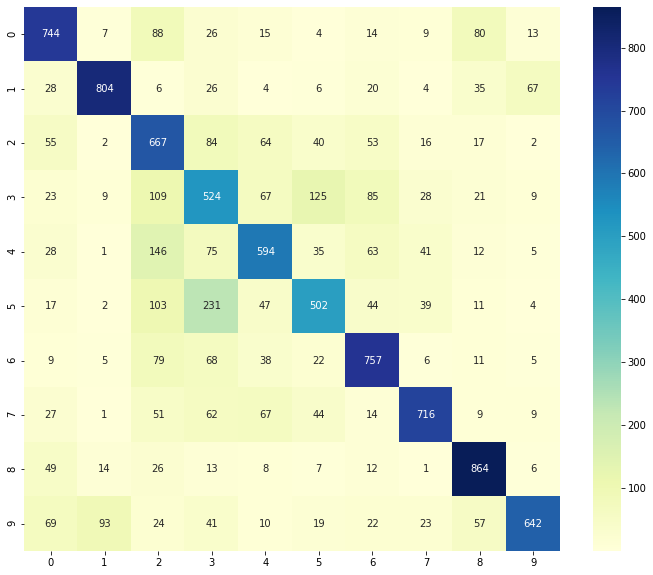

In [ ]:
results.append({
    "model_name" : "mergedConvModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (mergedConvModelTrainTime)),
    "accuracy" : mergedConvModelHistory.history["accuracy"][-1],
    "val_accuracy": mergedConvModelHistory.history["val_accuracy"][-1],
    "loss":mergedConvModelHistory.history["loss"][-1],
    "val_loss":mergedConvModelHistory.history["val_loss"][-1],
    "epochs" : "30",
})
y_pred_mergedConvModel = pd.DataFrame(mergedConvModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_mergedConvModel),cmap="YlGnBu",annot=True,fmt="d")

2.8

Epoch 1/50
782/782 [==============================] - 17s 21ms/step - loss: 1.8904 - accuracy: 0.2875 - val_loss: 1.2161 - val_accuracy: 0.5627
Epoch 2/50
782/782 [==============================] - 16s 21ms/step - loss: 1.1911 - accuracy: 0.5684 - val_loss: 0.9158 - val_accuracy: 0.6783
Epoch 3/50
782/782 [==============================] - 16s 20ms/step - loss: 0.9373 - accuracy: 0.6685 - val_loss: 0.8425 - val_accuracy: 0.7066
Epoch 4/50
782/782 [==============================] - 16s 21ms/step - loss: 0.8053 - accuracy: 0.7181 - val_loss: 0.7337 - val_accuracy: 0.7510
Epoch 5/50
782/782 [==============================] - 16s 20ms/step - loss: 0.7126 - accuracy: 0.7464 - val_loss: 0.7503 - val_accuracy: 0.7358
Epoch 6/50
782/782 [==============================] - 16s 21ms/step - loss: 0.6685 - accuracy: 0.7630 - val_loss: 0.6677 - val_accuracy: 0.7712
Epoch 7/50
782/782 [==============================] - 16s 20ms/step - loss: 0.5936 - accuracy: 0.7895 - val_loss: 0.6585 - val_accuracy:

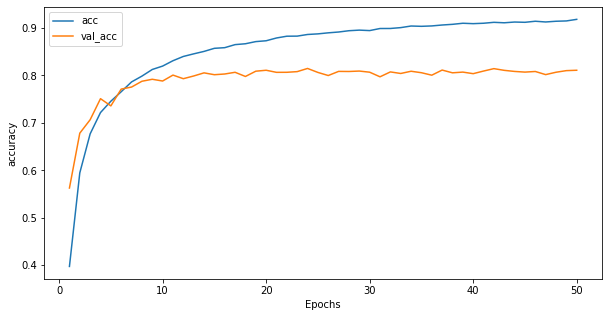

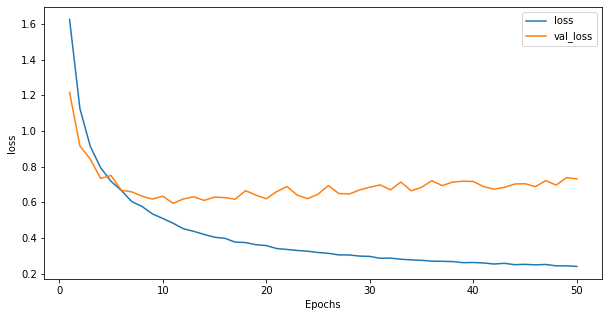

Testing Accuracy: 81.09%, Loss: 0.73
Train Time: 803.23 


In [ ]:
def dropOutModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
  return model

epochs=50
dropOutModel = dropOutModel()
start = time.time()
dropOutModelHistory = dropOutModel.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
end = time.time()
dropOutModelTrainTime = end-start
historyPlot(dropOutModelHistory.history,epochs)
print('Train Time: %.2f ' % (dropOutModelTrainTime))

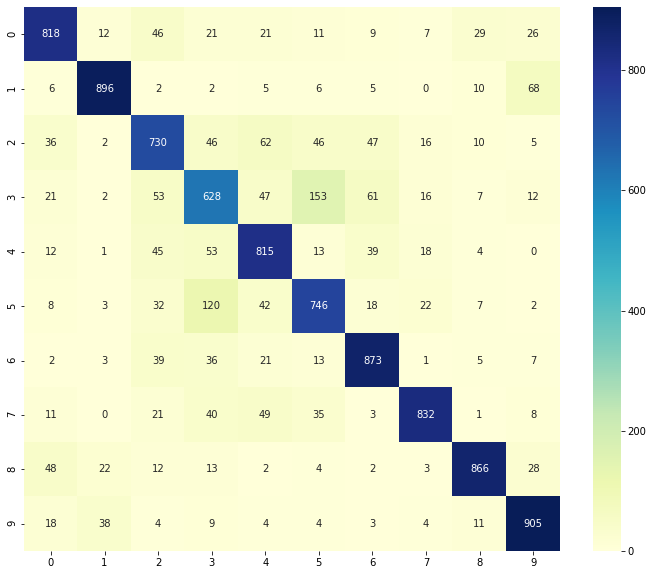

In [ ]:
results.append({
    "model_name" : "dropOutModel",
    "optimizer" : "adam",
    "train_time" : ('%.2f' % (dropOutModelTrainTime)),
    "accuracy" : dropOutModelHistory.history["accuracy"][-1],
    "val_accuracy": dropOutModelHistory.history["val_accuracy"][-1],
    "loss":dropOutModelHistory.history["loss"][-1],
    "val_loss":dropOutModelHistory.history["val_loss"][-1],
    "epochs" : "50",
})
y_pred_dropOutModel = pd.DataFrame(dropOutModel.predict(X_test)).idxmax(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_dropOutModel),cmap="YlGnBu",annot=True,fmt="d")

In [ ]:
pd.DataFrame.from_dict(results).drop_duplicates(subset=["model_name"],keep="last")

,model_name,optimizer,train_time,accuracy,val_accuracy,loss,val_loss,epochs
0,mainModel,adam,453.94,0.98002,0.7596,0.061574,1.769693,30
1,withoutFilterModel,adam,170.18,0.54096,0.4864,1.297448,1.480412,50
2,oneConvLayerModel,adam,248.85,0.98914,0.6602,0.033939,3.345236,30
3,twoConvLayerModel,adam,352.20,0.98750,0.7364,0.036860,2.346919,30
6,mergedConvModel,adam,297.80,0.97302,0.6814,0.086297,2.745016,30
7,dropOutModel,adam,803.23,0.91816,0.8109,0.240335,0.731651,50
8,sigmoidActivationModel,adam,160.15,0.66642,0.6063,0.949880,1.121088,10
9,tanhActivationModel,adam,160.81,0.87510,0.7367,0.350554,0.862790,10
10,reluActivationModel,adam,151.86,0.92626,0.7717,0.205218,0.882183,10
11,SGD_OptimizerModel,SGD,457.67,0.95968,0.6495,0.116364,2.051636,30
